# ML assignment 3
## Problem 1

In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
df = pd.read_csv('Concrete_Data.csv')

In [2]:
# rename columns
df.rename(columns=lambda x: x.split('(')[0], inplace=True)

In [3]:
df.assign().head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.describe(percentiles=[])

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.input=df.iloc[:,0:-1]
df.input.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [6]:
df.output=df.iloc[:,-1]
df.output.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete compressive strength, dtype: float64

In [7]:
# Show columns containing missing values
print("Columns containing missing value:", 
      df.columns[df.isna().any()].tolist())

Columns containing missing value: []


## Standardization
* Standardize each column 
* $Z = \frac{X-\mu}{\sigma}$

In [8]:
from sklearn.preprocessing import StandardScaler

df_origin = df
np_scaled = StandardScaler().fit_transform(df)
df = pd.DataFrame(np_scaled, columns=df.columns)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


### Visualiaztion for 9 attributes

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#g1 = sns.pairplot(df)
#g1.savefig("pairplot.png")

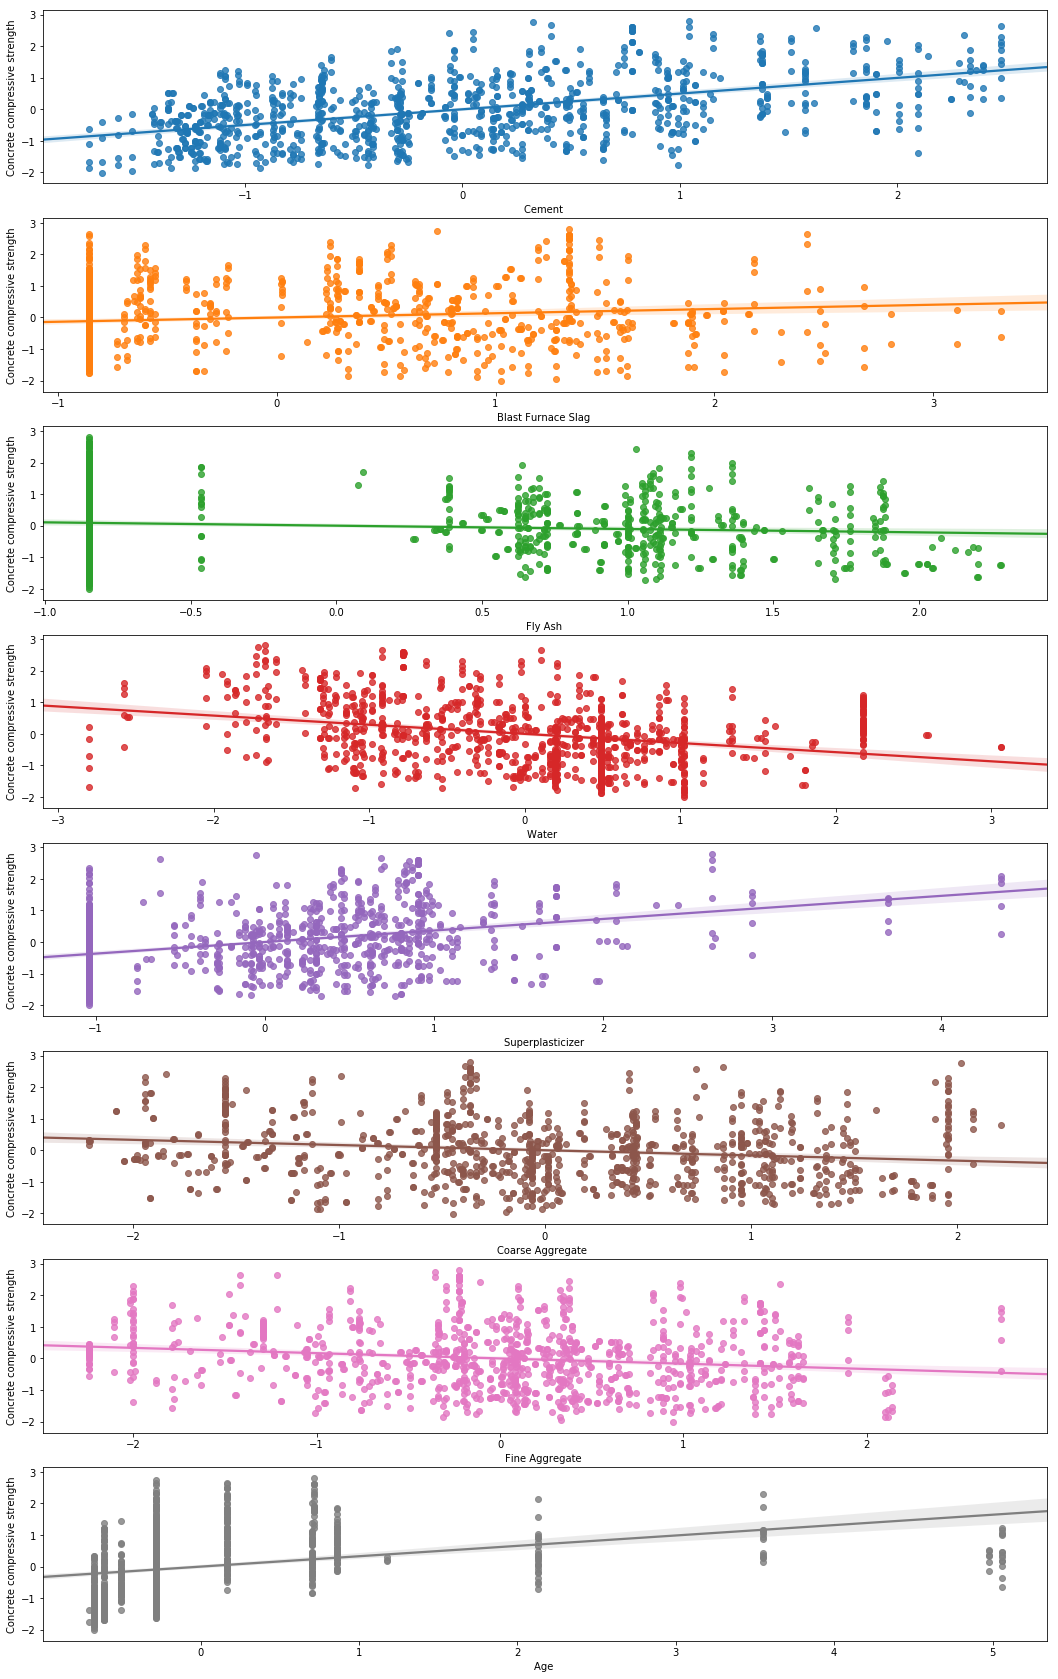

In [11]:
# Create a figure instance, and the two subplots
inputNum = 8

axes = []
fig, axes = plt.subplots(nrows=inputNum, sharey=True, figsize=(18, 30))

for i in range(0, inputNum):
    sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])

plt.show()

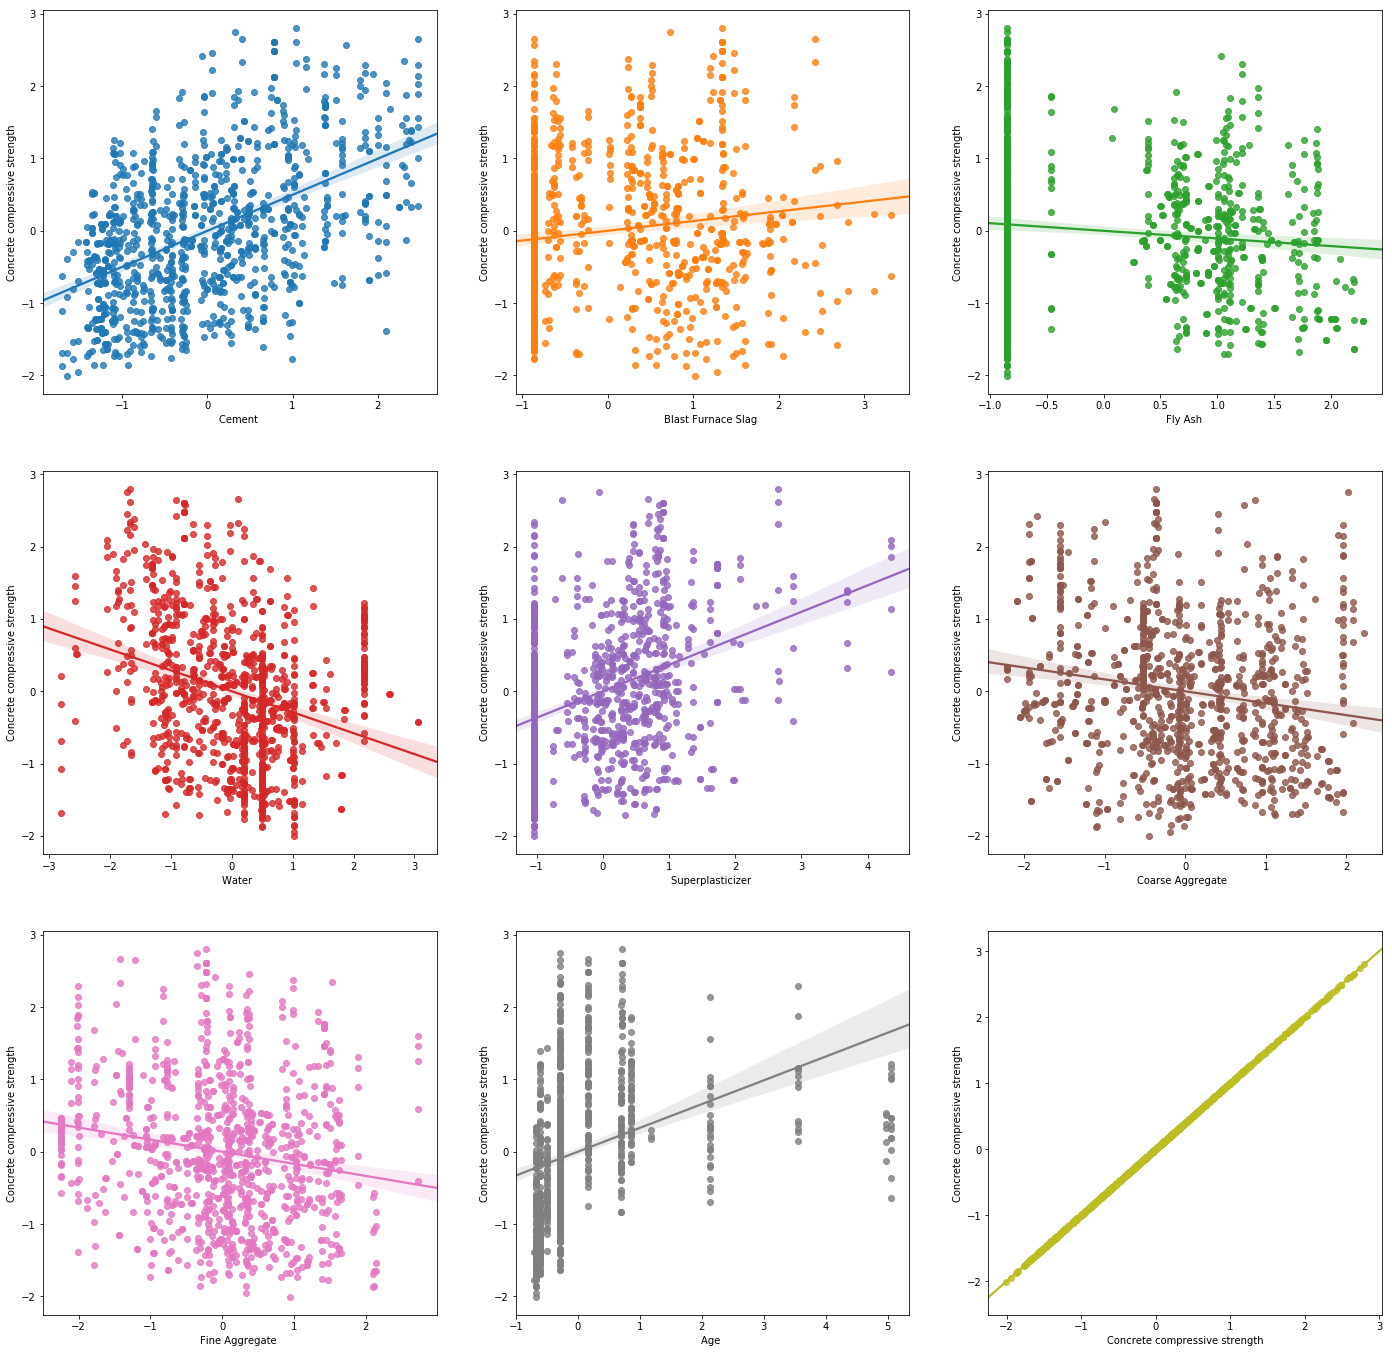

In [12]:
# Create a figure instance, and the two subplots
inputNum = 8

axes = []
fig, axes = plt.subplots(3, 3, figsize=(24, 24))

for i in range(0, 3):
    for j in range(0, 3):
        sns.regplot(x=df.columns[i*3+j], y=df.columns[inputNum], data=df, ax=axes[i][j])

plt.show()

## Data Selection & Data Partition
* For each input attribute
    * 80% data for training
    * 20% data for testing

In [13]:
X, y = df.iloc[:, 0], df.iloc[:, -1]

# X = X.values.reshape(-1, 1)
# y = y.values.reshape(-1, 1)

from sklearn.metrics import mean_squared_error, r2_score
row = ['lm1', 'lm2', 'lm3', 'lm4', 'lm5', 'lm6', 'lm7', 'lm8']
col = ['MSE', 'Cor', 'R2', 'bias', 'weight']
row = ['lm1', 'lm2', 'lm3', 'lm4', 'lm5', 'lm6', 'lm7', 'lm8']
col = ['MSE', 'Cor', 'R2', 'bias', 'weight']
regResult = pd.DataFrame(index=row, columns=col)

In [14]:
from sklearn.model_selection import train_test_split
trainCol = ['X_train', 'y_train']
testCol = ['X_test', 'y_test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
Train = pd.DataFrame(columns=trainCol)
Train.iloc[:, 0]=X_train.values
Train.iloc[:, 1]=y_train.values

Test = pd.DataFrame(columns=testCol)
Test.iloc[:, 0]=X_test.values
Test.iloc[:, 1]=y_test.values

In [16]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

## Simple linear regression
* iteratively train linear model with each attribute

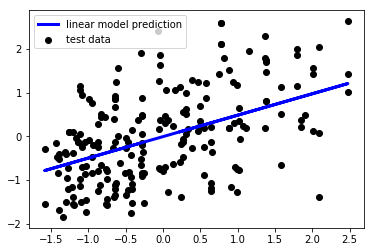

In [17]:
# simple linear regression by sklearn function
from sklearn.linear_model import LinearRegression

# Train linear model by training set
reg1 = LinearRegression().fit(X_train, y_train)
y_pred_lm = reg1.predict(X_test)
Test['y_pred_lm'] = y_pred_lm
# The coefficients
#print('Coefficients (weight): ', reg1.coef_)
#print('Intercept (bias): ', reg1.intercept_)
#print('linear model Correlation (R2-score): \n', reg1.score(X_train, y_train))


# Plot outputs
plt.scatter(X_test, y_test,  color='black', label='test data')
plt.plot(X_test, y_pred_lm, color='blue', linewidth=3, label='linear model prediction')

regResult.iloc[0, 0] = mean_squared_error(y_test, y_pred_lm)
regResult.iloc[0, 1] = reg1.score(X_train, y_train)
regResult.iloc[0, 2] = r2_score(y_test, y_pred_lm)
regResult.iloc[0, 3] = reg1.intercept_[0]
regResult.iloc[0, 4] = reg1.coef_[0]
regResult.assign()

plt.legend()
plt.show()


In [18]:
# cf. testing data(blue) & predicted data(orange)
#sns.regplot(x=X_test.reshape(1,-1)[0], y=y_test.reshape(1,-1)[0])

#sns.scatterplot(x='X_test', y='y_test', data=Test)
#sns.lineplot(x='X_test', y='y_pred_lm', data=Test, color='orange')



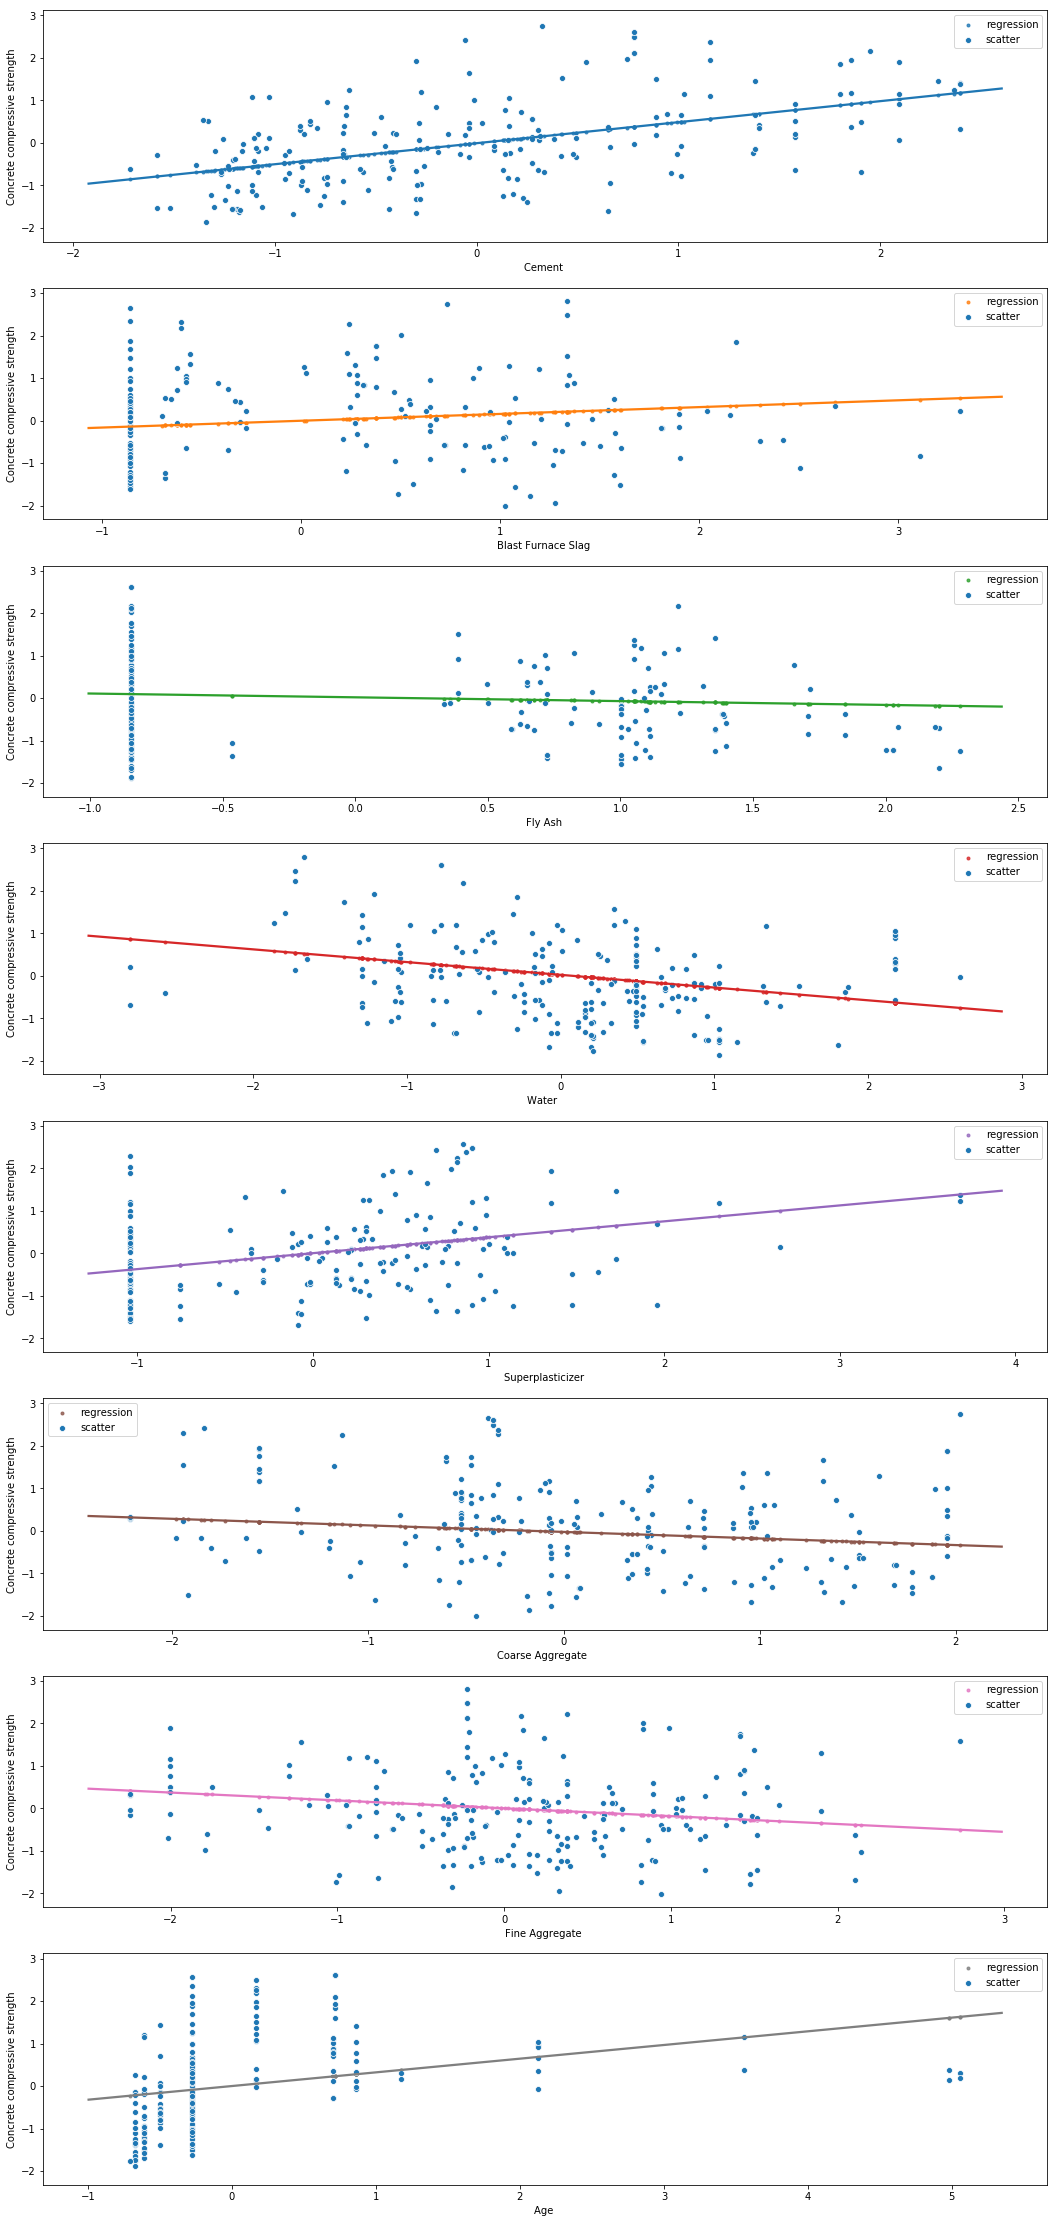

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

inputNum = 8

axes = []
fig, axes = plt.subplots(nrows=inputNum, sharey=True, figsize=(18, 40))

for i in range(0, inputNum):
    #sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])


    X, y = df.iloc[:, i], df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #df2 = pd.concat([X_train, X_test, y_train, y_test], axis=1)
    Train = pd.concat([X_train, y_train], axis=1)
    Test = pd.concat([X_test, y_test], axis=1)
    
    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)



    ### simple linear regression by sklearn function

    # Train linear model by training set
    reg1 = LinearRegression().fit(X_train, y_train)
    y_pred_lm = reg1.predict(X_test)
    Test['y_pred_lm'] = y_pred_lm

    # Plot outputs
    #sns.scatterplot(x=X_test.reshape(1,-1)[0], y=y_test.reshape(1,-1)[0], ax=axes[i])
    #sns.regplot(x=X_test.reshape(1,-1)[0], y=y_pred_lm.reshape(1,-1)[0], ax=axes[i])
    
    sns.regplot(x=Test.columns[0], y=Test.columns[2], 
                data=Test, ax=axes[i], label='regression', marker='.')
    sns.scatterplot(x=Test.columns[0], y=Test.columns[1], 
                    data=Test, ax=axes[i], label='scatter')


    #plt.plot(X_test, y_pred_lm, color='blue', linewidth=3)

    regResult.iloc[i, 0] = mean_squared_error(y_test, y_pred_lm)
    regResult.iloc[i, 1] = reg1.score(X_train, y_train)
    regResult.iloc[i, 2] = r2_score(y_test, y_pred_lm)
    regResult.iloc[i, 3] = reg1.intercept_[0]
    regResult.iloc[i, 4] = reg1.coef_[0]
    regResult.assign()

    #plt.legend()
    #plt.show()


In [20]:
regResult.assign()

,MSE,Cor,R2,bias,weight
lm1,0.74329,0.243448,0.264934,-0.00543217,[0.49482072081728834]
lm2,1.04683,0.0255667,-0.0143608,-0.00441318,[0.16034673099615798]
lm3,0.977931,0.00794855,0.0132729,0.0195105,[-0.08936340264409318]
lm4,0.859436,0.0887643,0.04599,0.0207419,[-0.29968188269430507]
lm5,0.849264,0.141587,0.0995764,0.00293916,[0.3746993503371243]
lm6,1.06223,0.0239516,0.0269258,-0.0245837,[-0.15459365979038853]
lm7,0.989838,0.0344375,-0.00119966,0.00449963,[-0.18509177227722434]
lm8,0.960421,0.106416,0.114222,0.000587268,[0.32190979366991396]


## Find most relative features
* Choose the largest |R2-score| 

In [21]:
regResult.sort_values(by='R2', ascending=False)

,MSE,Cor,R2,bias,weight
lm1,0.74329,0.243448,0.264934,-0.00543217,[0.49482072081728834]
lm8,0.960421,0.106416,0.114222,0.000587268,[0.32190979366991396]
lm5,0.849264,0.141587,0.0995764,0.00293916,[0.3746993503371243]
lm4,0.859436,0.0887643,0.04599,0.0207419,[-0.29968188269430507]
lm6,1.06223,0.0239516,0.0269258,-0.0245837,[-0.15459365979038853]
lm3,0.977931,0.00794855,0.0132729,0.0195105,[-0.08936340264409318]
lm7,0.989838,0.0344375,-0.00119966,0.00449963,[-0.18509177227722434]
lm2,1.04683,0.0255667,-0.0143608,-0.00441318,[0.16034673099615798]


* The first attribute(Cement) has largest |R2-score|, so it's most relative to target

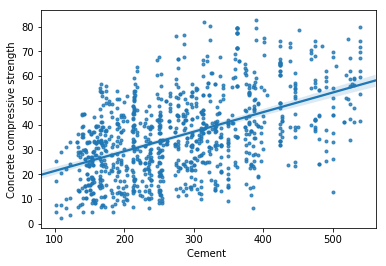

In [22]:
sns.regplot(x=df_origin.columns[0], y=df_origin.columns[8], data=df_origin, marker='.')

In [23]:
regResult.iloc[0:1]

,MSE,Cor,R2,bias,weight
lm1,0.74329,0.243448,0.264934,-0.00543217,[0.49482072081728834]
